In [1]:
import seaborn as sns
import funciones_ML as bt
import pandas as pd
import statsmodels.api as sm



In [2]:
df = sns.load_dataset("diamonds")

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.clarity.value_counts()/len(df)*100

clarity
SI1     24.221357
VS2     22.725250
SI2     17.044865
VS1     15.148313
VVS2     9.391917
VVS1     6.776047
IF       3.318502
I1       1.373749
Name: count, dtype: float64

In [6]:
df.color.value_counts()/len(df)*100

color
G    20.934372
E    18.162773
F    17.690026
H    15.394883
D    12.560252
I    10.051910
J     5.205784
Name: count, dtype: float64

In [7]:
df.cut.value_counts()/len(df)*100

cut
Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: count, dtype: float64

In [15]:

bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
carat,0.51,float64,0.8,No,0.47,0.22,0.4,0.7,1.04,numerica continua,0.0
cut,0.01,category,No,Ideal,No,No,No,No,No,categorica ordinal,0.0
color,0.01,category,No,G,No,No,No,No,No,categorica ordinal,0.0
clarity,0.01,category,No,SI1,No,No,No,No,No,categorica ordinal,0.0
depth,0.34,float64,61.75,No,1.43,2.05,61.0,61.8,62.5,numerica continua,0.0
table,0.24,float64,57.46,No,2.23,4.99,56.0,57.0,59.0,numerica continua,0.0
price,21.51,int64,3932.8,No,3989.44,15915629.42,950.0,2401.0,5324.25,numerica continua,0.0
x,1.03,float64,5.73,No,1.12,1.26,4.71,5.7,6.54,numerica continua,0.0
y,1.02,float64,5.73,No,1.14,1.3,4.72,5.71,6.54,numerica continua,0.0
z,0.7,float64,3.54,No,0.71,0.5,2.91,3.53,4.04,numerica continua,0.0


In [12]:
df_titanic=pd.read_csv(r"/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_18_DEEP_LEARNING/UNIT1/TRABAJO OBLIGATORIO/data/titanic.csv")

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Funcion: get_features_cat_num_classification

In [26]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency

def get_features_cat_num_classification(df, target_col, pvalue=0.05):
    # Comprobación de que df es un DataFrame
    if not isinstance(df, pd.DataFrame):
        print("Error: El primer argumento debe ser un DataFrame.")
        return None
    
    # Comprobación de que target_col es una columna en el DataFrame
    if target_col not in df.columns:
        print(f"Error: '{target_col}' no es una columna válida en el DataFrame.")
        return None
    
    # Comprobación de que pvalue es un valor válido
    if not (isinstance(pvalue, float) and 0 < pvalue < 1):
        print("Error: 'pvalue' debe ser un valor float en el rango (0, 1).")
        return None
    
    # Lista para almacenar las columnas significativas
    columnas_seleccionadas = []
    
    # Obtener los valores únicos de la columna target
    target_values = df[target_col].unique()
    
    # Comprobar si la variable target es categórica o numérica discreta
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() <= 10: #  menos de 10 valores únicos es categórico
            is_categorical = True
        else:
            is_categorical = False
    
    # Iterar sobre las columnas numéricas
    for col in df.select_dtypes(include=['number']):
        if is_categorical:
            # Realizar el test de Chi_cuadradado para variables categóricas
            tabla_contingencia = pd.crosstab(df[col], df[target_col])
            _, p_val, _, _ = chi2_contingency(tabla_contingencia)
            #no ponemos stadisttic ni tabla de libertad ya que no es necesario para esta funcion
        else:
            # Realizar el test ANOVA para variables numéricas
            p_val = f_oneway(df[col], df[target_col])[1]
        
        # Comprobar si el p-valor es menor o igual al límite
        if p_val <= (1 - pvalue):
            columnas_seleccionadas.append(col)
    
    return columnas_seleccionadas


In [38]:
result = get_features_cat_num_classification(df=df_titanic, target_col='alive', pvalue=0.05)
print("Columnas numéricas significativas:", result)

Columnas numéricas significativas: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


### Funcion: plot_features_cat_num_classification

imprime numericas y las categoricas pero repites algunos graficos(MEJORAR)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency

def plot_features_cat_num_classification(df, target_col, columns=[], pvalue=0.05, max_plots_per_figure=5):
    # Si la lista de columnas está vacía, asignar todas las variables numéricas del DataFrame
    if not columns:
        columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # Realizar el test ANOVA o de chi-cuadrado y mantener solo las columnas que cumplen con el umbral de significancia
    # segun sea numérica o categórica
    col_significativas = []
    for col in columns:
        if df[col].dtype == 'object' or df[col].nunique() <= 10:  # en caso de ser categórica o tener menos de 10 valores únicos
            tabla_contingencia = pd.crosstab(df[col], df[target_col])
            _, p_val, _, _ = chi2_contingency(tabla_contingencia)
            if p_val <= (1 - pvalue):
                col_significativas.append(col)
        else: # en caso de ser numérica
            for col in columns:
             p_val = f_oneway(*[group[col] for name, group in df.groupby(target_col)])[1]
             if p_val<= (1 - pvalue):
                 col_significativas.append(col)
        
            
    # Dividir las columnas en grupos de máximo subplots por figura
    column_groups = [col_significativas[i:i+max_plots_per_figure] for i in range(0, len(col_significativas), max_plots_per_figure)]
    
    # Generar pairplots para cada grupo de columnas
    for group in column_groups:
        if len(group) ==1: #comprobamos si solo hay 1 columna en el grupo
                fig, ax = plt.subplots(figsize=(4, 4))

        else:   
            num_plots = len(group)
            num_rows = (num_plots + 1) // 2
            num_cols = 2 if num_plots >1 else 1
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4*num_rows))
        
        # Convertir axes en una lista de listas para mantener la consistencia
        axes = [axes] if num_rows == 1 else axes
        
        for i, col in enumerate(group):
            if num_plots == 1:  # Si hay solo un subplot
                ax = axes[i]
            else:
                row_idx = i // num_cols
                col_idx = i % num_cols
                ax = axes[row_idx][col_idx]
               
            
            if df[col].dtype == 'object' or df[col].nunique() <= 10:
                sns.countplot(data=df, x=col, hue=target_col, ax=ax)
                ax.set_title(f'{col} vs {target_col}')
            else:
                sns.scatterplot(data=df, x=col, y=target_col, hue=target_col, ax=ax)
                ax.set_title(f'{col} vs {target_col}')
        
        plt.tight_layout()
        plt.show()
    
    return col_significativas

 

/tmp/ipykernel_25265/2269719112.py:22: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  p_val = f_oneway(*[group[col] for name, group in df.groupby(target_col)])[1]
/tmp/ipykernel_25265/2269719112.py:22: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  p_val = f_oneway(*[group[col] for name, group in df.groupby(target_col)])[1]


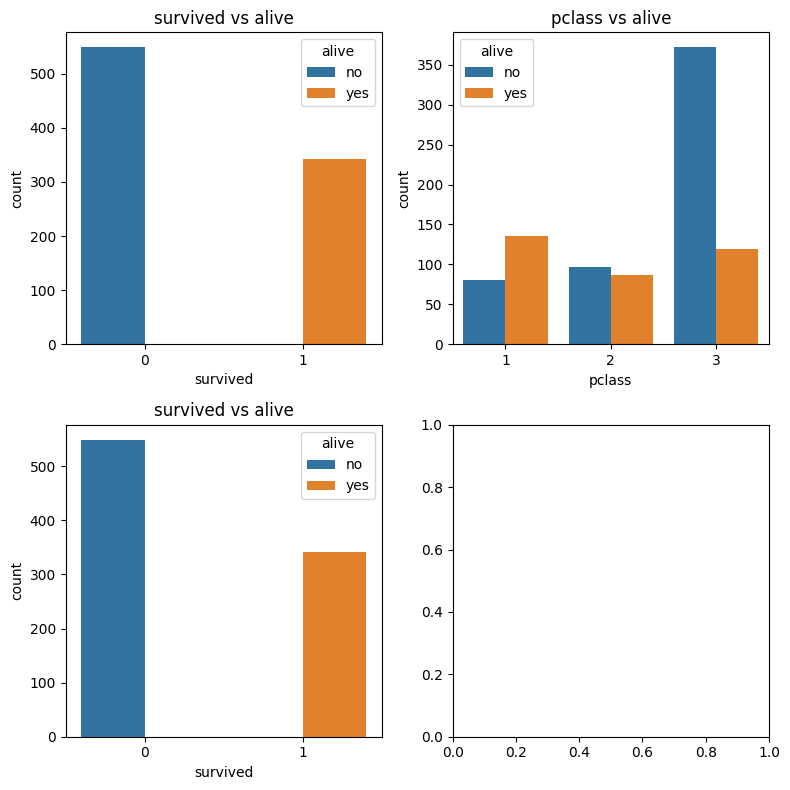

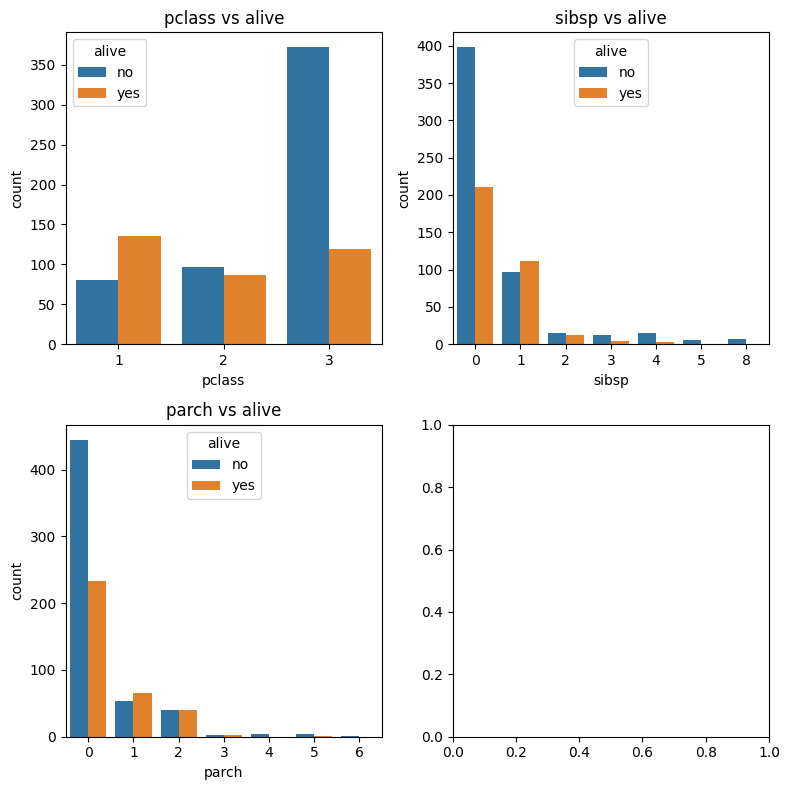

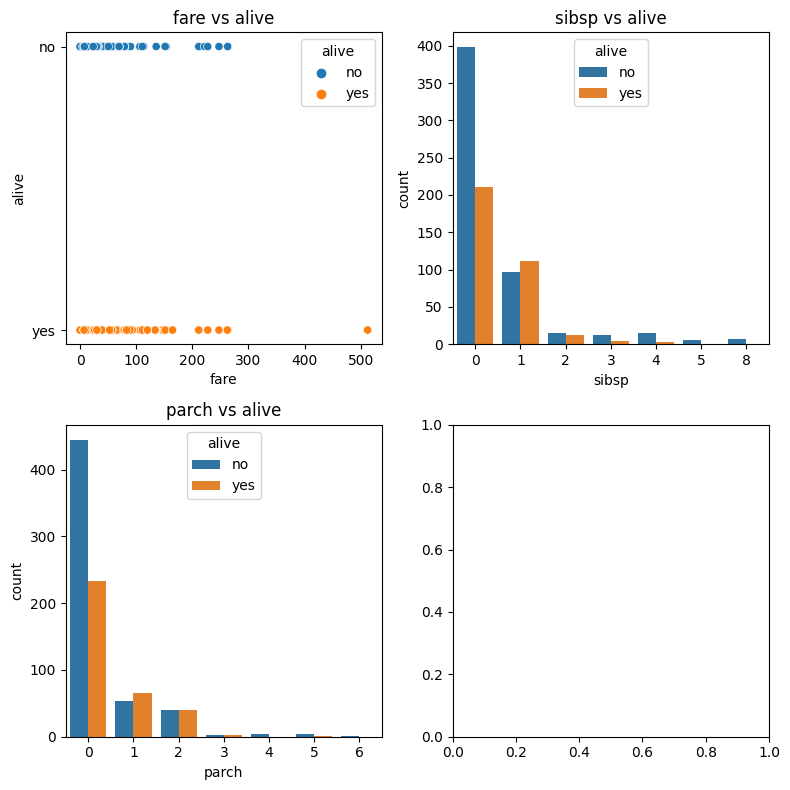

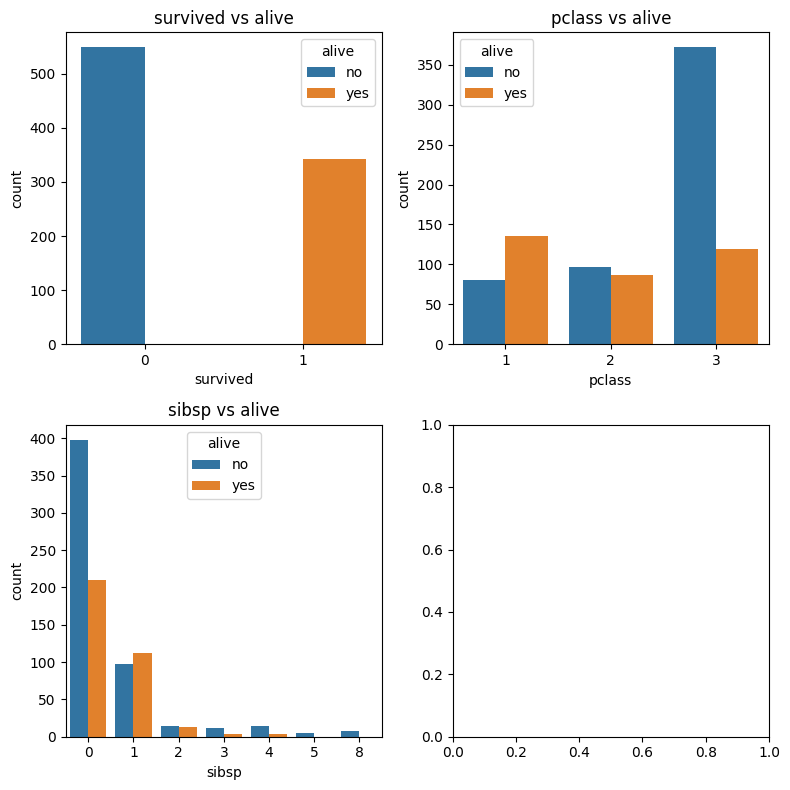

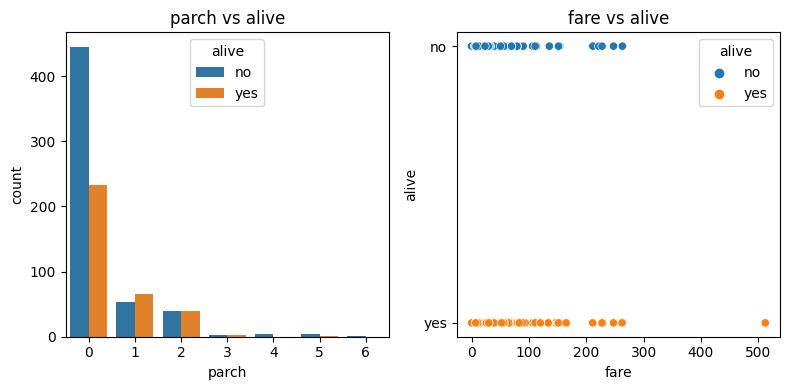

Columnas significativas: ['survived', 'pclass', 'survived', 'pclass', 'sibsp', 'parch', 'fare', 'sibsp', 'parch', 'survived', 'pclass', 'sibsp', 'parch', 'fare']


In [41]:

significant_cols =  plot_features_cat_num_classification(df_titanic, 'alive', columns=['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'])
print("Columnas significativas:", significant_cols)
#['carat', 'depth', 'table', 'x', 'y', 'z']
#['carat', 'depth', 'table','price', 'x', 'y', 'z']
# titanic
#['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'] -> alive